# Final homework

## References

* [Preprocessing and finding the barcode](https://pyimagesearch.com/2014/11/24/detecting-barcodes-images-python-opencv/)

* [Decoding the barcode](https://www.kaggle.com/code/rafunlearnhub/barcode-reading-from-scratch)

* [Recognizing one-dimensional barcode using OpenCV](https://opencv.org/recognizing-one-dimensional-barcode-using-opencv/)

## Load the image

First, load the image

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import pandas as pd
from PIL import Image

In [2]:
image_path = 'images/2003889393001.jpg'

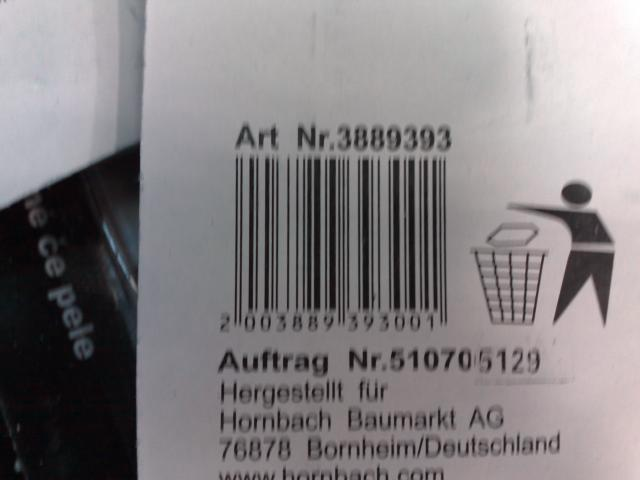

In [3]:
image = cv2.imread(image_path)
Image.fromarray(image)

## Pre-process the image

* Convert image to grayscale. 

* Compute the Scharr gradient magnitude representation of the images in both the x and y direction. 

* Subtract the y-gradient from the x-gradient.

* Blur an image using a 9 x 9 kernel and then threshold the image.

* Construct a closing rectangular kernel and apply it to the thresholded image.

* Perform a series of erosions and dilations to remove blobs.

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)

In [6]:
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

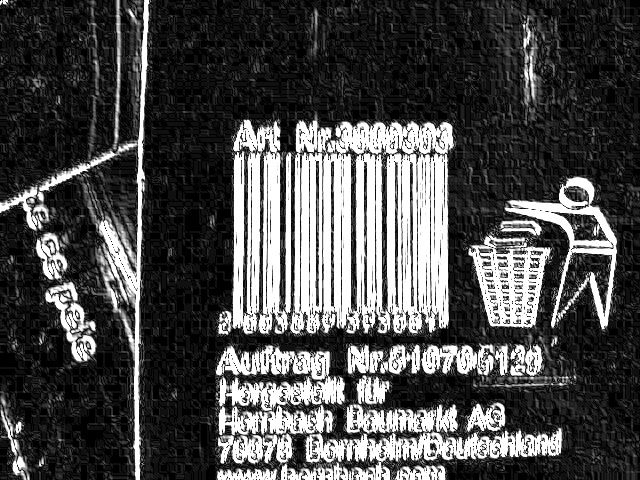

In [7]:
Image.fromarray(gradient)

In [8]:
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

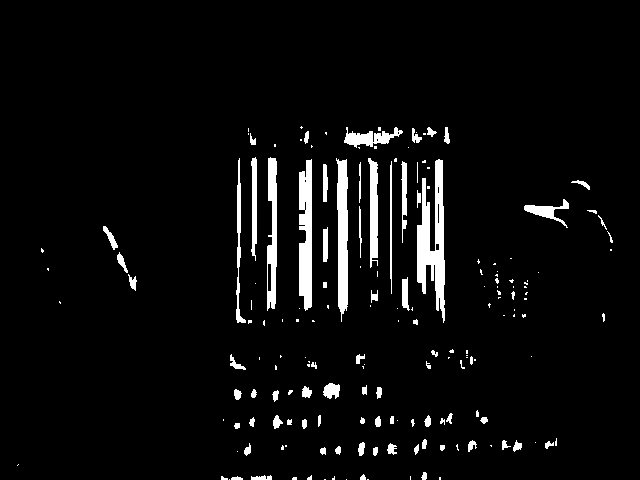

In [9]:
Image.fromarray(thresh)

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

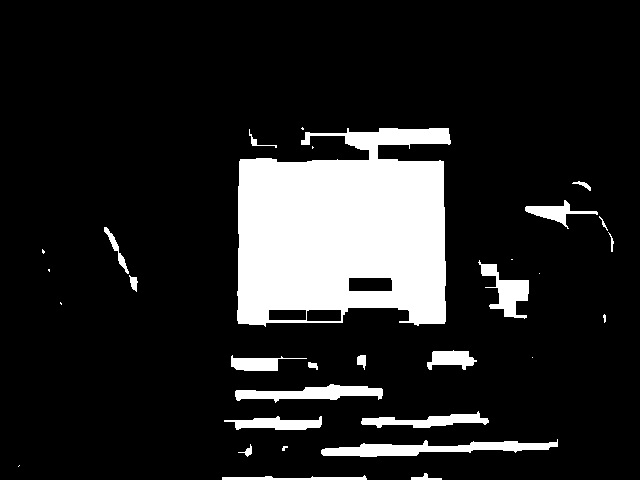

In [11]:
Image.fromarray(closed)

In [12]:
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

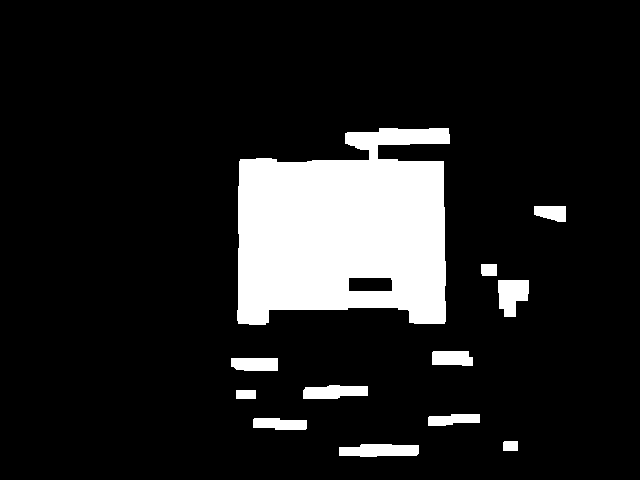

In [13]:
Image.fromarray(closed)

## Find the barcode

* Find the contours in the thresholded image.

* Sort the contours by their area, keeping only the largest one.

* Compute the rotated bounding box of the largest contour.

* ~~Draw a bounding box arounded the detected barcode and display the image.~~

* Crop the barcode from initial image.

In [14]:
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

In [15]:
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)

/tmp/ipykernel_65475/478297875.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


In [16]:
#cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
#Image.fromarray(image)

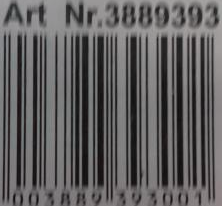

In [17]:
crop = image[(box[1][1] - 5):(box[3][1] + 5), (box[0][0] - 5):(box[2][0] + 5)]
Image.fromarray(crop)

## Decode the barcode

In [18]:
def cont_hi(num_img):
    #num_img = asarray(img)
    #num_img.setflags(write=1)
    for i in range(0 , len(num_img)):
        for j in range(0, len(num_img[i]) ):
            #if num_img[i][j][0] <= 200  and num_img[i][j][1] <= 200 and num_img[i][j][2] <= 200:
            mean1 = np.mean(num_img[i][j])
            #mean1_lst.append(mean1)
            if mean1 < 180: #180:
                num_img[i][j][0] = mean1
                num_img[i][j][1] = mean1
                num_img[i][j][2] = mean1
            else:
                num_img[i][j][0] = 255
                num_img[i][j][1] = 255
                num_img[i][j][2] = 255
    #img = Image.fromarray(num_img)
    return num_img

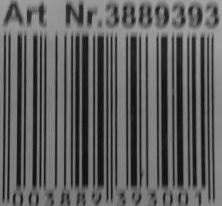

In [19]:
img = cont_hi(crop)
Image.fromarray(img)

In [20]:
h, l, m = np.shape(img)
h, l, m

(206, 222, 3)

In [21]:
arr = []
#for i in range(0, len(img)):
#for i in range(round(h/2), round(h/2)+1):  # 100th row is selected
for i in range(80,81):  # 100th row is selected    
    for j in range(0, len(img[i])):        # read all columns in 100th row
        if np.mean(img[i][j]) >= 100:      #
            arr.append(1)                  # white
        else:
            arr.append(0)                  # black

In [22]:
df = pd.DataFrame(arr, columns=['val'])
df = df.groupby([df['val'].ne(df['val'].shift()).cumsum(), 'val']).size()
df = df.reset_index(level=0, drop=True)
#print(df)
df = pd.DataFrame(df)
df = df.reset_index()
df.columns = ['val','count']

In [23]:
df0 = df.copy()
for i in range(0, len(df0['val']) ):
    if df0['val'][i] == 1:
        df0.drop([i], inplace = True)

df0 = df0.reset_index(level=0, drop=True)

#REMOVE BLACK==============KEEP WHITE========
df1 = df.copy()
for i in range(0, len(df1['val']) ):
    if df1['val'][i] == 0:
        df1.drop([i], inplace = True)

df1 = df1.reset_index(level=0, drop=True)

In [24]:
arrb = []
for i in range(0, len(df1['val'])):
    
    if df1['count'][i] <= 12:
        arrb.append(1)
        
    elif df1['count'][i] > 12 and df1['count'][i] <= 20:
        arrb.append(2)
        
    elif df1['count'][i] > 20 and df1['count'][i] <= 25:
        arrb.append(3)
        
    elif df1['count'][i] > 25 and df1['count'][i] <= 50:
        arrb.append(4)

print(arrb)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [25]:
arrw = []
for i in range(0, len(df1['val'])):
    
    if df1['count'][i] <= 10:
        arrw.append(1)
        
    elif df1['count'][i] > 10 and df1['count'][i] <= 20:
        arrw.append(2)
        
    elif df1['count'][i] > 20 and df1['count'][i] <= 30:
        arrw.append(3)
        
    elif df1['count'][i] > 30 and df1['count'][i] <= 120:
        arrw.append(4)

print(arrw)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [26]:
arr = []

for i in range(0, len(arrb)):
    arr.append(arrw[i])
    arr.append(arrb[i])
arr.append(arrw[len(arrw)-1])

print(arr)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [29]:
arr = arr[4:-4]
arr.pop(24); arr.pop(24); arr.pop(24); arr.pop(24); arr.pop(24); 

In [28]:
j=-4
arr1 = []
while j < len(arr)-4:
    j  = j+4
    print(str(j) +' '+ str(j+1) +' '+ str(j+2) +' '+ str(j+3))
    arr1.append( [( str(arr[j]) + str(arr[j+1]) + str(arr[j+2]) + str(arr[j+3]) )] )

0 1 2 3
4 5 6 7
8 9 10 11
12 13 14 15
16 17 18 19
20 21 22 23
24 25 26 27
28 29 30 31
32 33 34 35
36 37 38 39
40 41 42 43
44 45 46 47
48 49 50 51


IndexError: list index out of range

## Output the result